<a href="https://colab.research.google.com/github/Tara0599/Struktur-Data/blob/main/Struktur_data_prak8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

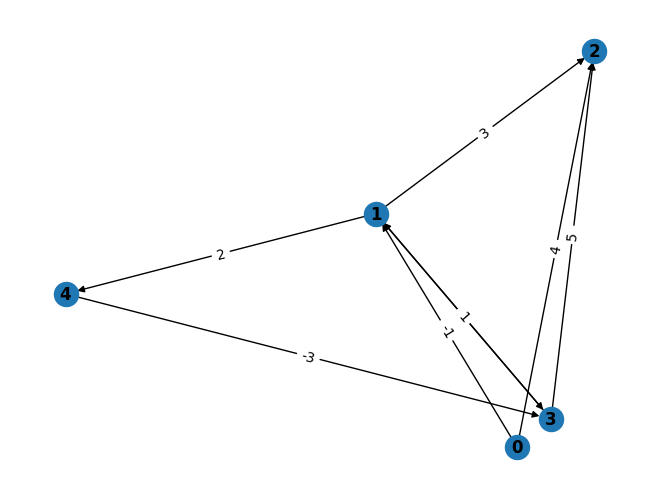

Vertex Distance from Source
0		0
1		-1
2		2
3		-2
4		1


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph):
    G = nx.DiGraph()

    for edge in graph:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

def BellmanFord(graph, V, E, src):
    # Initialize distance of all vertices as infinite.
    dis = [float('inf')] * V

    # initialize distance of source as 0
    dis[src] = 0

    # Relax all edges |V| - 1 times.
    for i in range(V - 1):
        for j in range(E):
            if dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]:
                dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2]

    # check for negative-weight cycles.
    for i in range(E):
        x, y, weight = graph[i]
        if dis[x] != float('inf') and dis[x] + weight < dis[y]:
            print("Graph contains negative weight cycle")

    print("Vertex Distance from Source")
    for i in range(V):
        print("%d\t\t%d" % (i, dis[i]))

# Driver Code
if __name__ == "__main__":
    V = 5  # Number of vertices in graph
    E = 8  # Number of edges in graph

    graph = [[0, 1, -1], [0, 2, 4], [1, 2, 3],
             [1, 3, 2], [1, 4, 2], [3, 2, 5],
             [3, 1, 1], [4, 3, -3]]

    # Visualize the graph
    draw_graph(graph)

    # Run Bellman-Ford algorithm
    BellmanFord(graph, V, E, 0)
